In [0]:
#Importando bibliotecas
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [0]:
#Lendo o arquivo "Zoo"
zoo = pd.read_csv('https://s3-sa-east-1.amazonaws.com/dados-leonardo/zoo.csv')

In [4]:
#Visualizando os 10 primeiros registros
print (zoo.head(10))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   
5     buffalo     1         0     0     1         0        0         0   
6        calf     1         0     0     1         0        0         0   
7        carp     0         0     1     0         0        1         0   
8     catfish     0         0     1     0         0        1         1   
9        cavy     1         0     0     1         0        0         0   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1   

In [5]:
#Retornando as principais estatísticas sobre o dataset
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
#Info
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
#verificando campos nulos
print('Valores faltantes:')
print(zoo.isna().sum())
print ('\n')

Valores faltantes:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64




In [0]:
#Dropando a coluna "Name" - Irrelevante ao processo de classificação
zoo = zoo.drop(['animal_name'], 1) #axis =1 (Dropa a coluna e não a linha)

In [9]:
X = zoo.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
print (X)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]


In [10]:
y = zoo.iloc[:,16].values
print(y)

[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [0]:
#Separando dados de treino e teste (30 a 70)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
Classif_KNN = KNeighborsClassifier(n_neighbors=1)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test, y_pred))

0.8709677419354839


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.25      1.00      0.40         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.17      0.29         6

   micro avg       0.84      0.84      0.84        31
   macro avg       0.80      0.88      0.76        31
weighted avg       0.93      0.84      0.82        31



[0.8709677419354839, 0.8387096774193549, 0.7741935483870968, 0.7419354838709677, 0.7419354838709677, 0.7096774193548387, 0.7419354838709677, 0.7096774193548387, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6451612903225806, 0.6451612903225806, 0.6451612903225806, 0.6774193548387096, 0.6774193548387096, 0.6774193548387096, 0.6451612903225806, 0.6451612903225806, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516]


Text(0, 0.5, 'Testing Accuracy')

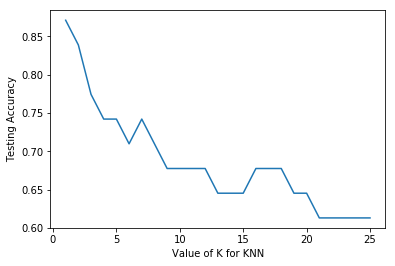

In [16]:
# testa do K=1 até K=26 
k_range = range(1, 26)

# Lista todos as acurácias
scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
#Plota os valores de acc. em função do valor escolhido de K
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
